## Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in the dataset

In [2]:
df = pd.read_excel (r'C:\Users\sreed\Churn.xlsx')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Exploring the dataset

In [3]:
print(df.shape)
print(df.dtypes)
df.describe()

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Checking for Null values, if any

In [4]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Dropping NA values

In [5]:
df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Replacing the Churn variable with 1 and 0

In [6]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df = df.iloc[:,1:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Exploratory Data Analysis

<AxesSubplot:xlabel='Churn'>

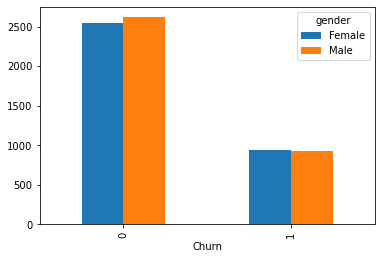

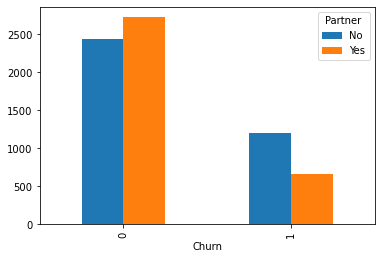

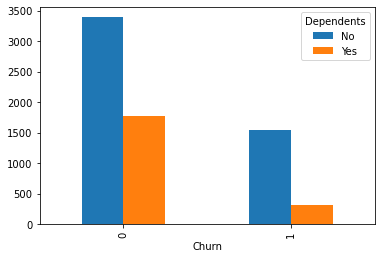

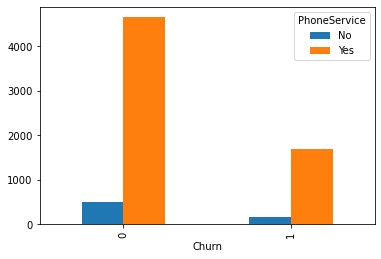

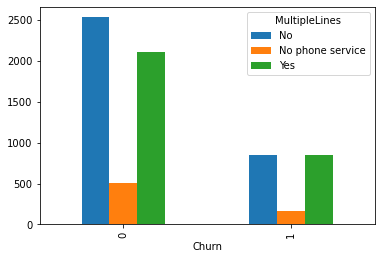

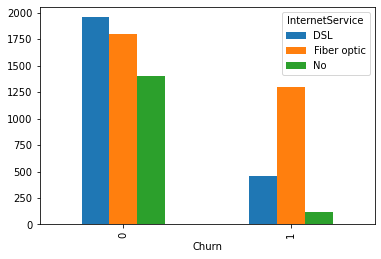

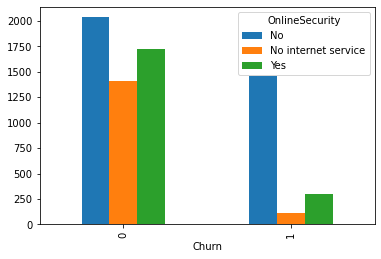

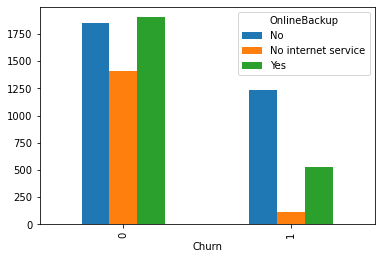

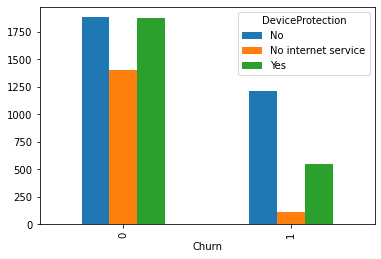

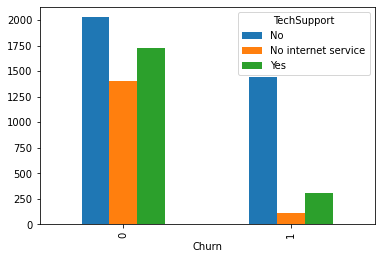

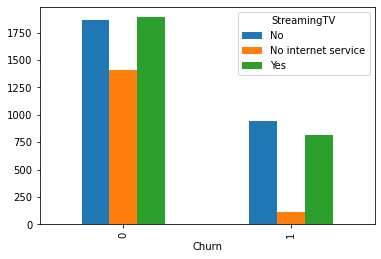

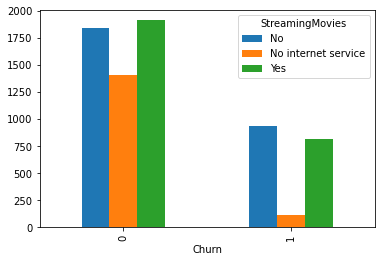

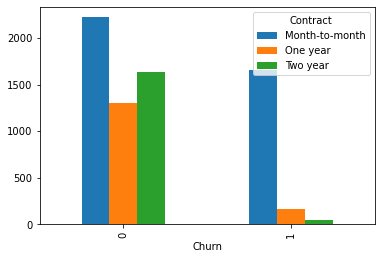

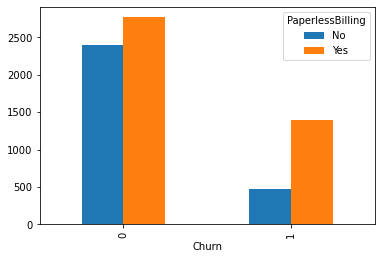

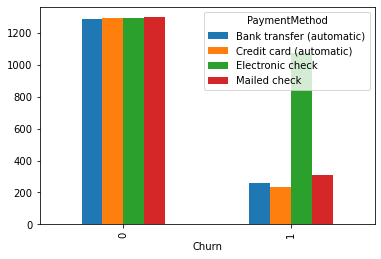

In [108]:
pd.crosstab(df.Churn,df.gender).plot(kind='bar')
pd.crosstab(df.Churn,df.Partner).plot(kind='bar')
pd.crosstab(df.Churn,df.Dependents).plot(kind='bar')
pd.crosstab(df.Churn,df.PhoneService).plot(kind='bar')
pd.crosstab(df.Churn,df.MultipleLines).plot(kind='bar')
pd.crosstab(df.Churn,df.InternetService).plot(kind='bar')
pd.crosstab(df.Churn,df.OnlineSecurity).plot(kind='bar')
pd.crosstab(df.Churn,df.OnlineBackup).plot(kind='bar')
pd.crosstab(df.Churn,df.DeviceProtection).plot(kind='bar')
pd.crosstab(df.Churn,df.TechSupport).plot(kind='bar')
pd.crosstab(df.Churn,df.StreamingTV).plot(kind='bar')
pd.crosstab(df.Churn,df.StreamingMovies).plot(kind='bar')
pd.crosstab(df.Churn,df.Contract).plot(kind='bar')
pd.crosstab(df.Churn,df.PaperlessBilling).plot(kind='bar')
pd.crosstab(df.Churn,df.PaymentMethod).plot(kind='bar')

## Dummy Encoding on categorical variables

In [7]:
df_dummies = pd.get_dummies(df)
df2 = df_dummies
pd.set_option('display.max_columns',None)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


## Checking the Correlation of parameters with respect to Churn

<AxesSubplot:>

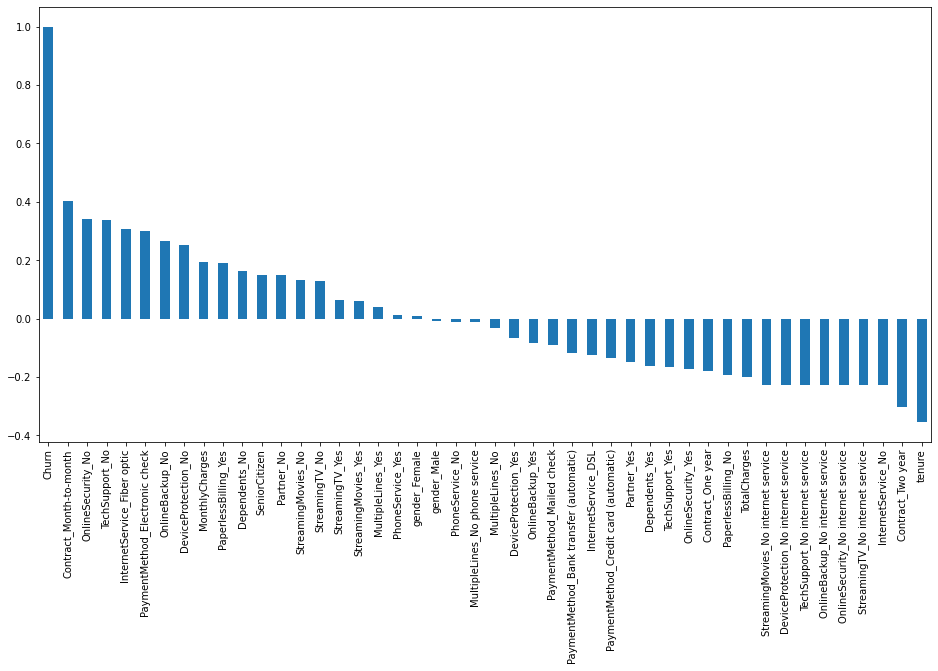

In [88]:
plt.figure(figsize=(16,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


Explanation: The variables at the left most of the graph are positively correlated with Churn and the right most ones are negatively correlted with churn. The ones in the middle are almost independent of the variable churn.

## Modelling

In [8]:
target = df_dummies.iloc[:,4]
inputs = df_dummies.drop(["Churn"],axis="columns")

In [9]:
inputs.drop(["gender_Female","gender_Male","PhoneService_Yes","PhoneService_No","MultipleLines_Yes","MultipleLines_No",
                "StreamingMovies_Yes","DeviceProtection_Yes","StreamingTV_Yes","DeviceProtection_Yes","OnlineBackup_Yes",
                "PaymentMethod_Mailed check","MultipleLines_No phone service"],
            axis="columns", inplace=True)
inputs

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,29.85,29.85,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
1,0,34,56.95,1889.50,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0
2,0,2,53.85,108.15,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0
4,0,2,70.70,151.65,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
7039,0,72,103.20,7362.90,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
7040,0,11,29.60,346.45,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
7041,1,4,74.40,306.60,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0


## Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25, random_state = 2)

## 1) Logistic Regression

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# multi_class = "ovr" mentions that the classification is binary
# "max_iter=4000"; the default is 100 and I obsereved that the accuracy improves with 4000
# penalty = "l2"; this is by default and is used to specify the norm used in the penalization

LR_model = LogisticRegression(multi_class = "ovr", max_iter = 4000, penalty = "l2")
clf_LR = GridSearchCV(LR_model,{
    'C':[0.1,1,10],
    'tol':[0.1,1,10]
    
}, return_train_score = False)

# The above code runs the model and returns the mean_test_score for all the permutations of the parameters.

clf_LR.fit(X_train, y_train.values.ravel())
res_LR=pd.DataFrame(clf_LR.cv_results_)
res_LR

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030205,0.004318,0.000399,0.000798,0.1,0.1,"{'C': 0.1, 'tol': 0.1}",0.8,0.821801,0.804739,0.792417,0.804554,0.804702,0.009648,1
1,0.030303,0.001327,0.000403,0.000806,0.1,1,"{'C': 0.1, 'tol': 1}",0.8,0.821801,0.804739,0.792417,0.804554,0.804702,0.009648,1
2,0.028617,0.006662,0.003619,0.003677,0.1,10,"{'C': 0.1, 'tol': 10}",0.8,0.821801,0.804739,0.792417,0.804554,0.804702,0.009648,1
3,0.050396,0.013890,0.002524,0.002945,1,0.1,"{'C': 1, 'tol': 0.1}",0.8,0.813270,0.800948,0.792417,0.802657,0.801858,0.006698,7
4,0.048354,0.013441,0.002015,0.003114,1,1,"{'C': 1, 'tol': 1}",0.8,0.813270,0.800948,0.792417,0.802657,0.801858,0.006698,7
5,0.051613,0.010025,0.002928,0.003710,1,10,"{'C': 1, 'tol': 10}",0.8,0.813270,0.800948,0.792417,0.802657,0.801858,0.006698,7
6,0.064483,0.021877,0.003626,0.003684,10,0.1,"{'C': 10, 'tol': 0.1}",0.8,0.816114,0.808531,0.784834,0.807400,0.803376,0.010585,4
7,0.062074,0.019426,0.002418,0.002953,10,1,"{'C': 10, 'tol': 1}",0.8,0.816114,0.808531,0.784834,0.807400,0.803376,0.010585,4
8,0.065217,0.019493,0.001213,0.000991,10,10,"{'C': 10, 'tol': 10}",0.8,0.816114,0.808531,0.784834,0.807400,0.803376,0.010585,4


From the above results we realize that, when C=10, irrespective of tolerance the model achieves an accuracy of 80.4702%.

In [93]:
LR_model_best = LogisticRegression(multi_class = "ovr", max_iter = 4000, penalty = "l2", C = 10, tol = 0.1)
LR_model_best.fit(X_train,y_train.values.ravel())

LogisticRegression(C=10, max_iter=4000, multi_class='ovr', tol=0.1)

<AxesSubplot:>

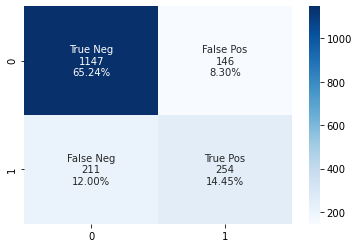

In [94]:
from sklearn.metrics import confusion_matrix
preds = LR_model_best.predict(X_test)
obs = y_test
cf_matrix = confusion_matrix(obs, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## 2) K Nearest Neighbors

In [95]:
from sklearn.neighbors import KNeighborsClassifier

leaf_size = list(range(1,20,5))
n_neighbors = list(range(1,20,5))
p=[1]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, hyperparameters, cv=5, return_train_score=False)
#Fit the model
clf_knn.fit(X_train,y_train.values.ravel())

res_knn=pd.DataFrame(clf_knn.cv_results_)
res_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047181,0.006505,0.025132,0.005466,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.699526,0.720379,0.723223,0.734597,0.700190,0.715583,0.013694,13
1,0.044300,0.003035,0.029464,0.002102,1,6,1,"{'leaf_size': 1, 'n_neighbors': 6, 'p': 1}",0.781991,0.773460,0.774408,0.781043,0.783681,0.778916,0.004166,5
2,0.046354,0.003430,0.036419,0.004179,1,11,1,"{'leaf_size': 1, 'n_neighbors': 11, 'p': 1}",0.773460,0.778199,0.767773,0.769668,0.785579,0.774936,0.006406,11
3,0.042722,0.001280,0.035086,0.005985,1,16,1,"{'leaf_size': 1, 'n_neighbors': 16, 'p': 1}",0.781991,0.783886,0.777251,0.785782,0.794118,0.784606,0.005537,1
4,0.035326,0.003936,0.021592,0.001015,6,1,1,"{'leaf_size': 6, 'n_neighbors': 1, 'p': 1}",0.700474,0.720379,0.722275,0.734597,0.700190,0.715583,0.013376,13
5,0.032578,0.003067,0.024383,0.004195,6,6,1,"{'leaf_size': 6, 'n_neighbors': 6, 'p': 1}",0.781991,0.773460,0.773460,0.781043,0.783681,0.778727,0.004383,8
6,0.035396,0.003920,0.025662,0.003935,6,11,1,"{'leaf_size': 6, 'n_neighbors': 11, 'p': 1}",0.773460,0.778199,0.767773,0.769668,0.785579,0.774936,0.006406,11
7,0.032498,0.003085,0.026057,0.003845,6,16,1,"{'leaf_size': 6, 'n_neighbors': 16, 'p': 1}",0.782938,0.782938,0.777251,0.785782,0.794118,0.784606,0.005505,1
8,0.028439,0.003097,0.023973,0.003651,11,1,1,"{'leaf_size': 11, 'n_neighbors': 1, 'p': 1}",0.700474,0.719431,0.722275,0.734597,0.700190,0.715393,0.013313,15
9,0.030871,0.000470,0.025369,0.004578,11,6,1,"{'leaf_size': 11, 'n_neighbors': 6, 'p': 1}",0.781991,0.773460,0.774408,0.781043,0.783681,0.778916,0.004166,5


In [96]:
knn_best = KNeighborsClassifier(leaf_size = 6, n_neighbors = 16, p = 1)
knn_best.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(leaf_size=6, n_neighbors=16, p=1)

<AxesSubplot:>

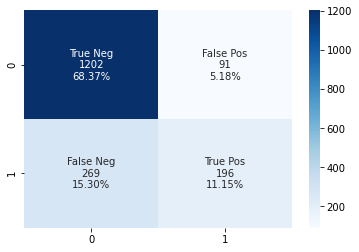

In [97]:
from sklearn.metrics import confusion_matrix
preds = knn_best.predict(X_test)
obs = y_test
cf_matrix = confusion_matrix(obs, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## 4) Support Vector Machines

In [103]:
from sklearn import svm

svmc = svm.SVC(gamma='auto')
clf_svm = GridSearchCV(svmc,{
    'C': [1,5,10],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score = False)

clf_svm.fit(X_train, y_train.values.ravel())
res_svm=pd.DataFrame(clf_svm.cv_results_)
res_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.331534,0.094217,0.271554,0.033663,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.764929,0.769668,0.754502,0.763033,0.759013,0.762229,0.005164,4
1,173.011586,23.237857,0.031044,0.001178,1,linear,"{'C': 1, 'kernel': 'linear'}",0.794313,0.804739,0.792417,0.786730,0.798861,0.795412,0.006074,1
2,1.436082,0.064049,0.265507,0.007752,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.750711,0.758294,0.739336,0.759242,0.751423,0.751801,0.007130,5
3,265.974544,29.706790,0.028850,0.003216,5,linear,"{'C': 5, 'kernel': 'linear'}",0.792417,0.805687,0.787678,0.779147,0.792220,0.791430,0.008600,2
4,1.516275,0.167247,0.259766,0.004185,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.745024,0.759242,0.742180,0.758294,0.746679,0.750284,0.007081,6
5,280.331242,85.846020,0.029109,0.006302,10,linear,"{'C': 10, 'kernel': 'linear'}",0.795261,0.798104,0.792417,0.771564,0.791271,0.789723,0.009384,3


In [ ]:
from sklearn import svm
svm_best = svm.SVC(gamma = 'auto', C = 1, kernel = 'linear')
svm_best.fit(X_train,y_train.values.ravel())

In [ ]:
from sklearn.metrics import confusion_matrix
preds = svm_best.predict(X_test)
obs = y_test
cf_matrix = confusion_matrix(obs, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## 5) AdaBoost Classifier

In [98]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

ada_b = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ada_b.fit(X_train,y_train)
preds = ada_b.predict(X_test)
obs = y_test
metrics.accuracy_score(y_test, preds)

0.800910125142207

<AxesSubplot:>

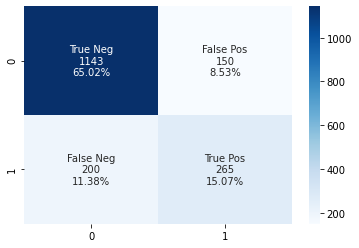

In [99]:
from sklearn.metrics import confusion_matrix
preds = ada_b.predict(X_test)
obs = y_test
cf_matrix = confusion_matrix(obs, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## 6) XGBoost Classifier

In [101]:
from xgboost import XGBClassifier
from sklearn import metrics

xg_b = XGBClassifier()
xg_b.fit(X_train, y_train)
preds = xg_b.predict(X_test)
obs = y_test

metrics.accuracy_score(y_test, preds)

C:\Users\sreed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7810011376564278

<AxesSubplot:>

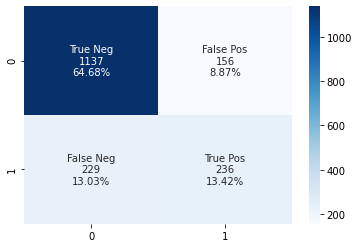

In [102]:
from sklearn.metrics import confusion_matrix
preds = xg_b.predict(X_test)
obs = y_test
cf_matrix = confusion_matrix(obs, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## 7) Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_model = DecisionTreeClassifier()
params = dict(max_depth=[2,4,6,8,10,12])
clf_dt= GridSearchCV(tree_model, params, cv=5, return_train_score=False)
clf_dt.fit(X_train,y_train.values.ravel())
res_dt=pd.DataFrame(clf_dt.cv_results_)
res_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008007,0.000012,0.003200,0.003919,2,{'max_depth': 2},0.723223,0.773460,0.753555,0.756398,0.759013,0.753130,0.016451,5
1,0.007037,0.007163,0.001504,0.003009,4,{'max_depth': 4},0.765877,0.797156,0.784834,0.772512,0.794118,0.782899,0.012087,2
2,0.009373,0.007653,0.003120,0.006239,6,{'max_depth': 6},0.787678,0.790521,0.788626,0.771564,0.784630,0.784604,0.006792,1
3,0.010720,0.001403,0.003243,0.003971,8,{'max_depth': 8},0.790521,0.796209,0.780095,0.768720,0.752372,0.777583,0.015715,3
4,0.012199,0.003117,0.002037,0.003139,10,{'max_depth': 10},0.755450,0.760190,0.754502,0.764929,0.759013,0.758817,0.003721,4
5,0.014261,0.004253,0.000404,0.000808,12,{'max_depth': 12},0.745024,0.746919,0.748815,0.734597,0.751423,0.745356,0.005781,6


In [105]:
dt_best = DecisionTreeClassifier(max_depth = 6)
dt_best.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(max_depth=6)

<AxesSubplot:>

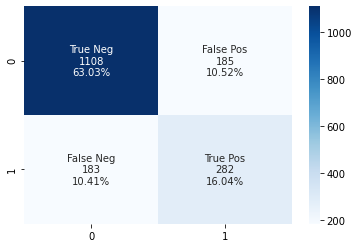

In [106]:
from sklearn.metrics import confusion_matrix
preds = dt_best.predict(X_test)
obs = y_test
cf_matrix = confusion_matrix(obs, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')